# Team Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

In [2]:
%matplotlib inline

In [3]:
sns.set_theme()

In [5]:
# create dataframe and remove extra column
raceResults = pd.read_csv('data/compiled-data/race-results.csv')
raceResults.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
raceResults.head()

,POS,Driver,Car,Laps,Time/Retired,PTS,Race
0,1,Charles Leclerc,Ferrari,57,37:33.6,26,BAHRAIN
1,2,Carlos Sainz,Ferrari,57,+5.598s,18,BAHRAIN
2,3,Lewis Hamilton,Mercedes,57,+9.675s,15,BAHRAIN
3,4,George Russell,Mercedes,57,+11.211s,12,BAHRAIN
4,5,Kevin Magnussen,Haas Ferrari,57,+14.754s,10,BAHRAIN


In [7]:
raceResults.describe()

,Laps,PTS
count,440.000000,440.000000
mean,53.475000,5.095455
std,17.306017,7.263663
min,0.000000,0.000000
25%,50.000000,0.000000
50%,57.000000,0.500000
75%,66.000000,9.250000
max,72.000000,26.000000


In [15]:
teamNameArray = ['Ferrari', 'Red Bull Racing RBPT', 'Mercedes', 'McLaren Mercedes', 'Alpine Renault', 'Alfa Romeo Ferrari', 'AlphaTauri RBPT', 'Williams Mercedes', 'Aston Martin Aramco Mercedes', 'Haas Ferrari']
len(teamNameArray)

10

In [16]:
driverNameArray = ['Max Verstappen', 'Charles Leclerc', 'Sergio Perez', 'Carlos Sainz', 'George Russell', 'Lando Norris', 'Esteban Ocon', 'Lance Stroll', 'Daniel Ricciardo', 'Sebastian Vettel', 'Yuki Tsunoda', 'Zhou Guanyu', 'Alexander Albon', 'Pierre Gasly', 'Valtteri Bottas', 'Mick Schumacher', 'Kevin Magnussen', 'Lewis Hamilton', 'Nicholas Latifi', 'Fernando Alonso']

# Average number of points per race

In [47]:
avgPoints = pd.DataFrame()
avgPoints = avgPoints.assign(Team = '', AvgPoints = '')
avgPoints.head()

,Team,AvgPoints


In [48]:
for i in teamNameArray:
    testRes = round(raceResults.loc[raceResults['Car'] == i]['PTS'].mean(), 2)
    avgPoints.loc[-1] = [i, testRes]
    avgPoints.index = avgPoints.index + 1

avgPoints.sort_values(by='AvgPoints', inplace=True, ascending=False)

In [12]:
# not a great way of doing this per race - plenty of repeated code!
#redBull = raceResults.loc[raceResults['Car'] == 'Red Bull Racing RBPT']
#redBull.head()

,POS,Driver,Car,Laps,Time/Retired,PTS,Race
17,18,Sergio Perez,Red Bull Racing RBPT,56,DNF,0,BAHRAIN
18,19,Max Verstappen,Red Bull Racing RBPT,54,DNF,0,BAHRAIN
20,1,Max Verstappen,Red Bull Racing RBPT,50,24:19.3,25,SAUDI ARABIA
23,4,Sergio Perez,Red Bull Racing RBPT,50,+10.800s,12,SAUDI ARABIA
41,2,Sergio Perez,Red Bull Racing RBPT,58,+20.524s,18,AUSTRALIA


In [15]:
#redBull['PTS'].mean()

16.285714285714285

In [16]:
#ferrari = raceResults.loc[raceResults['Car'] == 'Ferrari']
#ferrari.head()

,POS,Driver,Car,Laps,Time/Retired,PTS,Race
0,1,Charles Leclerc,Ferrari,57,37:33.6,26,BAHRAIN
1,2,Carlos Sainz,Ferrari,57,+5.598s,18,BAHRAIN
21,2,Charles Leclerc,Ferrari,50,+0.549s,19,SAUDI ARABIA
22,3,Carlos Sainz,Ferrari,50,+8.097s,15,SAUDI ARABIA
40,1,Charles Leclerc,Ferrari,58,27:46.5,26,AUSTRALIA


In [17]:
#ferrari['PTS'].mean()

11.642857142857142

[Text(0, 0, 'Red Bull Racing RBPT'),
 Text(1, 0, 'Ferrari'),
 Text(2, 0, 'Mercedes'),
 Text(3, 0, 'Alpine Renault'),
 Text(4, 0, 'McLaren Mercedes'),
 Text(5, 0, 'Aston Martin Aramco Mercedes'),
 Text(6, 0, 'Alfa Romeo Ferrari'),
 Text(7, 0, 'AlphaTauri RBPT'),
 Text(8, 0, 'Haas Ferrari'),
 Text(9, 0, 'Williams Mercedes')]

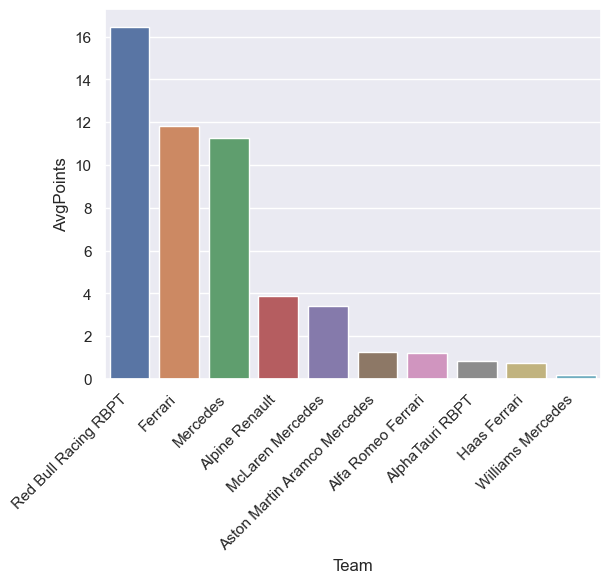

In [49]:
plot = sns.barplot(data=avgPoints, x='Team', y='AvgPoints')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Standard Deviation

In [9]:
deviation = pd.DataFrame()
deviation = deviation.assign(Team = '', Deviation = '')
deviation.head()

,Team,Deviation


In [12]:
for i in teamNameArray:
    testRes = round(raceResults.loc[raceResults['Car'] == i]['PTS'].std(), 2)
    deviation.loc[-1] = [i, testRes]
    deviation.index = deviation.index + 1

# Fastest lap - average speed

In [14]:
fastestLap = pd.read_csv('data/compiled-data/fastest-laps.csv')
fastestLap.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
fastestLap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
0,16,Charles Leclerc,Ferrari,BAHRAIN,94.6,206.018
1,1,Max Verstappen,Red Bull Racing RBPT,BAHRAIN,95.4,204.140
2,55,Carlos Sainz,Ferrari,BAHRAIN,95.7,203.501
3,11,Sergio Perez,Red Bull Racing RBPT,BAHRAIN,96.1,202.762
4,44,Lewis Hamilton,Mercedes,BAHRAIN,96.2,202.469


In [43]:
avgFastestLap = pd.DataFrame()
avgFastestLap = avgFastestLap.assign(Driver = '', AvgFastestLap = '')
avgFastestLap.head()

,Driver,AvgFastestLap


In [44]:
for i in driverNameArray:
    testRes = round(fastestLap.loc[fastestLap['DRIVER'] == i]['FL'].mean(), 2)
    avgFastestLap.loc[-1] = [i, testRes]
    avgFastestLap.index = avgFastestLap.index + 1

avgFastestLap.sort_values(by='AvgFastestLap', inplace=True)